In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

In [3]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [4]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.drop(train_data[(train_data['OverallQual'] < 4) & (train_data['SalePrice'] > 200000)].index, inplace = True)
train_data.drop(train_data[(train_data['OverallCond'] < 4) & (train_data['SalePrice'] > 200000)].index, inplace = True)
train_data.reset_index(drop = True, inplace = True)

In [7]:
train_data.shape

(1458, 81)

In [8]:
from scipy.stats import norm

The value of mu before log trans:  180761.24142661178
The value of sigma before log trans:  79270.93617295024


C:\Users\tiobi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\tiobi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


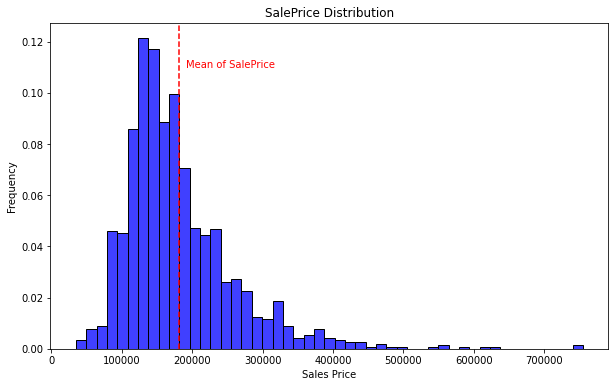

In [9]:
(mu, sigma) = norm.fit(train_data['SalePrice'])
print("The value of mu before log trans: ", mu)
print("The value of sigma before log trans: ", sigma)

fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(train_data['SalePrice'], color = "b", stat = "probability")
ax.xaxis.grid(False)
ax.set(ylabel = "Frequency")
ax.set(xlabel = "Sales Price")
ax.set(title = "SalePrice Distribution")

plt.axvline(mu, color = 'r', LineStyle = '--')
plt.text(mu+10000, 0.11, 'Mean of SalePrice', color = 'r')
fig.show()

C:\Users\tiobi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app


The value of mu after log trans:  12.0233397799989
The value of sigma after log trans:  0.3989191793099824


C:\Users\tiobi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


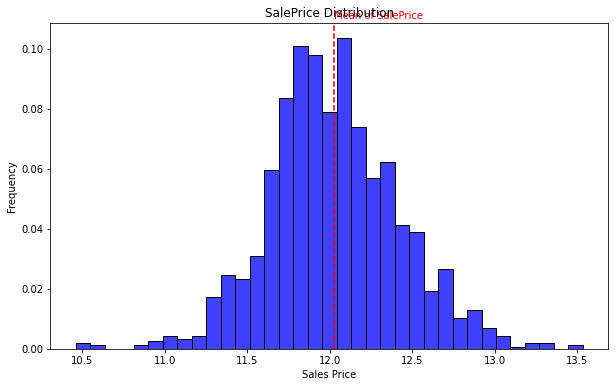

In [10]:
import numpy as np
train_data['SalePrice']  = np.log1p(train_data['SalePrice'])

(mu, sigma) = norm.fit(train_data['SalePrice'])
print("The value of mu after log trans: ", mu)
print("The value of sigma after log trans: ", sigma)

fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(train_data['SalePrice'], color = "b", stat = "probability")
ax.xaxis.grid(False)
ax.set(ylabel = "Frequency")
ax.set(xlabel = "Sales Price")
ax.set(title = "SalePrice Distribution")

plt.axvline(mu, color = 'r', LineStyle = '--')
plt.text(mu+.0001, 0.11, 'Mean of SalePrice', color = 'r')
fig.show()

In [11]:
train_ID = train_data['Id']
test_ID = test_data['Id']
train_data.drop(['Id'], axis = 1, inplace = True)
test_data.drop(['Id'], axis = 1, inplace = True)

train_data.shape, test_data.shape

((1458, 80), (1459, 79))

In [12]:
train_data.shape, test_data.shape

((1458, 80), (1459, 79))

<AxesSubplot:>

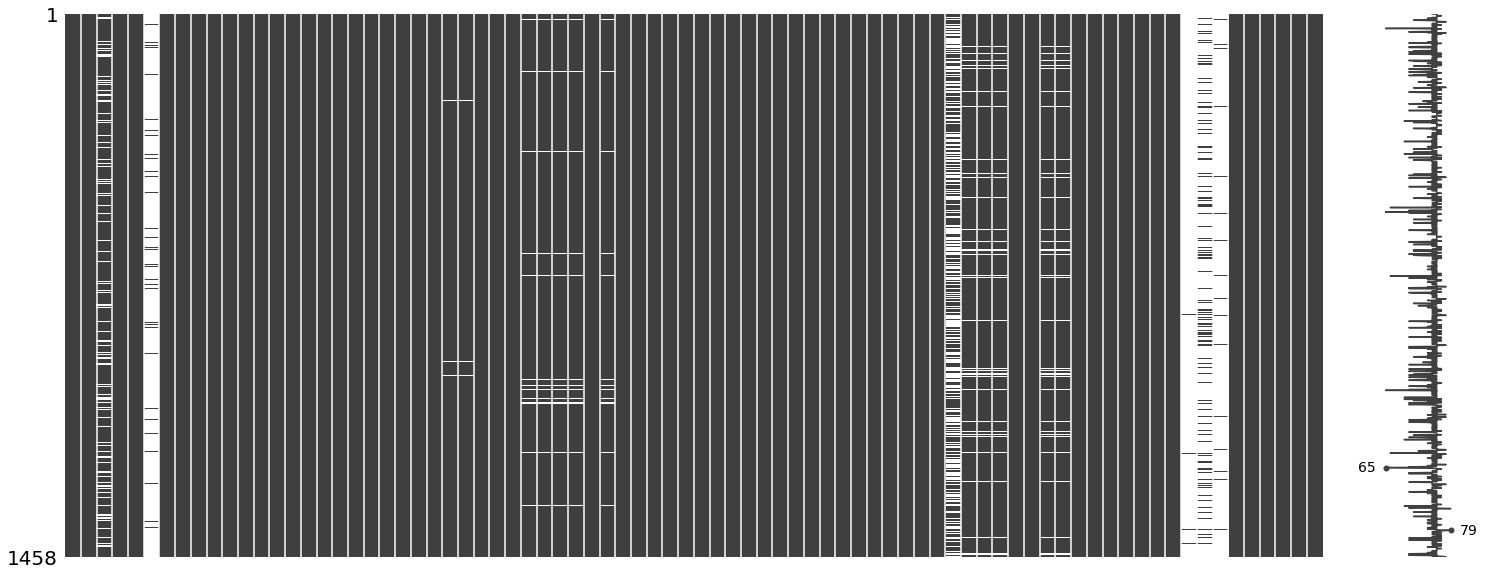

In [13]:
msno.matrix(df = train_data)

In [18]:
for col in train_data.columns:
    if train_data[col].isnull().any():
        msg = 'column: {:>15} | Percentage of NaN Value: {:.2f}% | '.format(col, 100*(train_data[col].isnull().sum() / train_data[col].shape[0]))
        print(msg)

column:     LotFrontage | Percentage of NaN Value: 17.70%
column:           Alley | Percentage of NaN Value: 93.76%
column:      MasVnrType | Percentage of NaN Value: 0.48%
column:      MasVnrArea | Percentage of NaN Value: 0.48%
column:        BsmtQual | Percentage of NaN Value: 2.54%
column:        BsmtCond | Percentage of NaN Value: 2.54%
column:    BsmtExposure | Percentage of NaN Value: 2.61%
column:    BsmtFinType1 | Percentage of NaN Value: 2.54%
column:    BsmtFinType2 | Percentage of NaN Value: 2.61%
column:      Electrical | Percentage of NaN Value: 0.07%
column:     FireplaceQu | Percentage of NaN Value: 47.33%
column:      GarageType | Percentage of NaN Value: 5.56%
column:     GarageYrBlt | Percentage of NaN Value: 5.56%
column:    GarageFinish | Percentage of NaN Value: 5.56%
column:      GarageQual | Percentage of NaN Value: 5.56%
column:      GarageCond | Percentage of NaN Value: 5.56%
column:          PoolQC | Percentage of NaN Value: 99.52%
column:           Fence | P

In [19]:
def check_na(data, head_num = 6):
    isnull_na = (data.isnull().sum()/len(data))*100
    data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending = False)
    missing_data = pd.DataFrame({'Missing Ration' : data_na, 'Data Type': data.dtypes[data_na.index]})
    print("결측치 데이터 칼럼과 건수:\n", missing_data.head(head_num))

In [22]:
all_df = pd.concat([train_data, test_data]).reset_index(drop = True)
check_na(all_df, 20)

결측치 데이터 칼럼과 건수:
               Missing Ration Data Type
PoolQC             99.657182    object
MiscFeature        96.400411    object
Alley              93.212204    object
Fence              80.425094    object
SalePrice          50.017141   float64
FireplaceQu        48.680151    object
LotFrontage        16.626671   float64
GarageCond          5.450806    object
GarageYrBlt         5.450806   float64
GarageFinish        5.450806    object
GarageQual          5.450806    object
GarageType          5.382242    object
BsmtExposure        2.811107    object
BsmtCond            2.811107    object
BsmtQual            2.776826    object
BsmtFinType2        2.742544    object
BsmtFinType1        2.708262    object
MasVnrType          0.788481    object
MasVnrArea          0.754200   float64
MSZoning            0.137127    object


In [23]:
all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu', 'LotFrontage'], axis = 1, inplace = True)
check_na(all_df, 20)

결측치 데이터 칼럼과 건수:
               Missing Ration Data Type
SalePrice          50.017141   float64
GarageCond          5.450806    object
GarageQual          5.450806    object
GarageFinish        5.450806    object
GarageYrBlt         5.450806   float64
GarageType          5.382242    object
BsmtCond            2.811107    object
BsmtExposure        2.811107    object
BsmtQual            2.776826    object
BsmtFinType2        2.742544    object
BsmtFinType1        2.708262    object
MasVnrType          0.788481    object
MasVnrArea          0.754200   float64
MSZoning            0.137127    object
Utilities           0.068564    object
BsmtFullBath        0.068564   float64
BsmtHalfBath        0.068564   float64
Functional          0.068564    object
Electrical          0.034282    object
KitchenQual         0.034282    object


In [25]:
train_ID

0          1
1          2
2          3
3          4
4          5
        ... 
1453    1456
1454    1457
1455    1458
1456    1459
1457    1460
Name: Id, Length: 1458, dtype: int64

In [30]:
y = train_data['SalePrice'].reset_index(drop = true)
train_data = train_data.drop('SalePrice', axis = 1)
train_data.shape

KeyError: 'SalePrice'

In [28]:
import numpy as np
cat_all_vars = train_data.select_dtypes(exclude = [np.number])
print("The whole number of all_vars", len(list(cat_all_vars)))

final_cat_vars = []
for v in cat_all_vars:
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']:
        final_cat_vars.append(v)

print("The whole number of final_cat_vars", len(final_cat_vars))

for i in final_cat_vars:
    all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

The whole number of all_vars 43
The whole number of final_cat_vars 38


In [31]:
check_na(all_df, 20)

결측치 데이터 칼럼과 건수:
               Missing Ration Data Type
SalePrice          50.017141   float64
GarageYrBlt         5.450806   float64
MasVnrArea          0.754200   float64
BsmtFullBath        0.068564   float64
BsmtHalfBath        0.068564   float64
BsmtFinSF1          0.034282   float64
BsmtFinSF2          0.034282   float64
BsmtUnfSF           0.034282   float64
TotalBsmtSF         0.034282   float64
GarageCars          0.034282   float64
GarageArea          0.034282   float64


In [32]:
from scipy.stats import skew

def find_skew(x):
    return skew(x)

skew_features = all_df[num_all_vars].apply(find_skew).sort_values(ascending=False)
skew_features

NameError: name 'num_all_vars' is not defined